In [1]:
from fastai.tabular import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"

Mounted at /content/gdrive


In [3]:
train_df = pd.read_csv(  '/content/gdrive/My Drive/app/data/Price/Train.csv')
test_df =  pd.read_csv(  '/content/gdrive/My Drive/app/data/Price/Test.csv')

In [4]:
train_df.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [5]:
#Check Missing Values
percent_missing = train_df.isnull().sum() * 100 / len(train_df)
missing_value_df = pd.DataFrame({'column_name': train_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
Item_Id,Item_Id,0.0
Date,Date,0.0
State_of_Country,State_of_Country,0.0
Market_Category,Market_Category,0.0
Product_Category,Product_Category,0.0
Grade,Grade,0.0
Demand,Demand,0.0
Low_Cap_Price,Low_Cap_Price,0.0
High_Cap_Price,High_Cap_Price,0.0


In [6]:
#Get overall sense of data
train_df.describe()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
count,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,14.278730,198.414064,2.492958,0.652072,71.977414,3500.273525,6349.838028
std,8.760964,169.767862,4.751807,1.032439,927.194052,2188.046803,3652.780956
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,163.000000
25%,3.000000,55.000000,0.000000,0.000000,0.500000,1863.250000,3878.250000
50%,20.000000,129.000000,0.000000,0.000000,2.000000,3124.000000,5552.500000
75%,21.000000,389.000000,1.000000,2.000000,10.175000,4667.500000,7993.750000
max,23.000000,471.000000,17.000000,3.000000,64160.500000,17580.000000,58812.000000


In [7]:
# #Use of Upper and Lower cap on the x column - Trial
# percentiles = train_df["High_Cap_Price"].quantile([0.005,0.995]).values
# train_df["High_Cap_Price"] = np.clip(train_df["High_Cap_Price"], percentiles[0], percentiles[1])
# train_df.describe()

In [8]:
#train_df.corr()

In [9]:
#Use of Normalisation on the Y column to get faster feedback in NNet
max_price =max(train_df['Low_Cap_Price'])
min_price =min(train_df['Low_Cap_Price'])
train_df['Low_Cap_Price'] = train_df['Low_Cap_Price'].apply(lambda x: (x-min_price)/(max_price-min_price))

In [10]:
train_df['Low_Cap_Price'] = np.log(train_df['Low_Cap_Price'])

In [11]:
#Create additonal features using the date given
add_datepart(train_df, "Date", drop=False)
add_datepart(test_df, "Date", drop=False)

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,IT_1,2007-07-05,0,0,0,0,0.5,0.158371,4240,2007,7,27,5,3,186,False,False,False,False,False,False,1183593600
1,IT_2,2007-07-05,0,1,0,0,0.7,0.203254,4756,2007,7,27,5,3,186,False,False,False,False,False,False,1183593600
2,IT_3,2007-07-05,0,103,0,1,1.6,0.340008,9669,2007,7,27,5,3,186,False,False,False,False,False,False,1183593600
3,IT_4,2007-07-05,0,103,0,0,0.0,0.323113,8313,2007,7,27,5,3,186,False,False,False,False,False,False,1183593600
4,IT_5,2007-07-05,0,103,0,2,0.0,0.280050,7257,2007,7,27,5,3,186,False,False,False,False,False,False,1183593600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,IT_95425,2010-06-08,20,255,0,2,30.4,0.006997,604,2010,6,23,8,1,159,False,False,False,False,False,False,1275955200
9794,IT_95456,2010-06-08,9,60,1,3,1480.0,0.012742,1461,2010,6,23,8,1,159,False,False,False,False,False,False,1275955200
9795,IT_95457,2010-06-08,21,37,1,2,24.4,0.268502,6637,2010,6,23,8,1,159,False,False,False,False,False,False,1275955200
9796,IT_95472,2010-06-08,21,469,0,0,2.3,0.289038,6997,2010,6,23,8,1,159,False,False,False,False,False,False,1275955200


,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303,2014,1,3,19,6,19,False,False,False,False,False,False,1390089600
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492,2014,1,3,19,6,19,False,False,False,False,False,False,1390089600
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706,2014,1,3,19,6,19,False,False,False,False,False,False,1390089600
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464,2014,1,3,19,6,19,False,False,False,False,False,False,1390089600
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222,2014,1,3,19,6,19,False,False,False,False,False,False,1390089600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5758,IT_361691,2015-09-29,21,375,10,0,3.4,10925,2015,9,40,29,1,272,False,False,False,False,False,False,1443484800
5759,IT_361694,2015-09-29,21,310,13,0,1.8,9089,2015,9,40,29,1,272,False,False,False,False,False,False,1443484800
5760,IT_361699,2015-09-29,21,445,10,0,0.2,9656,2015,9,40,29,1,272,False,False,False,False,False,False,1443484800
5761,IT_361719,2015-09-29,21,452,13,0,3.4,8070,2015,9,40,29,1,272,False,False,False,False,False,False,1443484800


In [12]:
train_df.columns

Index(['Item_Id', 'Date', 'State_of_Country', 'Market_Category',
       'Product_Category', 'Grade', 'Demand', 'Low_Cap_Price',
       'High_Cap_Price', 'Year', 'Month', 'Week', 'Day', 'Dayofweek',
       'Dayofyear', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Elapsed'],
      dtype='object')

In [13]:
# Define the Columns for the Tabular Learner
dep_var = 'Low_Cap_Price'
cat_names = ['State_of_Country', 'Market_Category', 'Product_Category', 'Grade','Month',	'Dayofweek','Is_month_end','Week']
cont_names = ['Demand', 'High_Cap_Price']
procs = [FillMissing, Categorify, Normalize]

In [14]:
# Creation of the Data for the Tabular learner
test = TabularList.from_df(test_df, 
                           cat_names=cat_names, 
                           cont_names=cont_names, procs=procs)

data = (TabularList.from_df(train_df, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct(0.10) # .split_none()
                           .label_from_df(cols=dep_var)
                           .add_test(test)
                           .databunch(bs=1024))

In [15]:
len(data.test_ds)

5763

In [16]:
#Display the data batch
data.show_batch(rows = 2)

State_of_Country,Market_Category,Product_Category,Grade,Month,Dayofweek,Is_month_end,Week,Demand,High_Cap_Price,target
17,358,0,3,8,4,False,32,-0.0766,2.5172,0.33284032
21,469,0,2,4,5,False,17,-0.0763,-0.3344,0.20780477


In [17]:
#Initializing the Model
learn = tabular_learner(data, layers=[300,200, 100, 50], metrics= rmse,emb_drop=0.12,callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-05
Min loss divided by 10: 3.02E-02


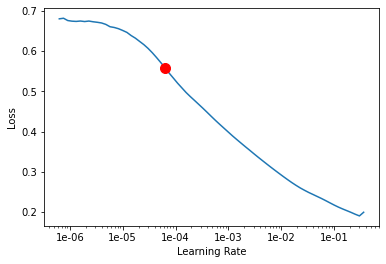

In [18]:
#Exploring the learning rates
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.320933,0.015819,0.125774,00:00
1,0.158615,0.010266,0.101323,00:00
2,0.102261,0.007972,0.089286,00:00
3,0.072140,0.007394,0.085989,00:00
4,0.053847,0.004681,0.068416,00:00
5,0.041674,0.002692,0.051885,00:00
6,0.033064,0.002353,0.048505,00:00
7,0.026749,0.002166,0.046538,00:00
8,0.021974,0.002079,0.045594,00:00
9,0.018291,0.002039,0.045159,00:00


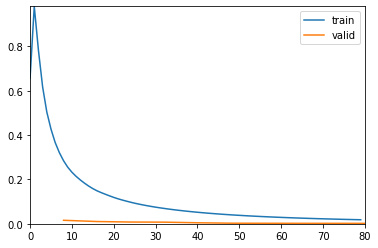

In [19]:
lr =1e-1
mod_name="stage1"
# smaller rate with smaller steps
learn.fit_one_cycle(12, slice(lr))

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.002278,0.002591,0.050898,00:00
1,0.017353,0.023483,0.153242,00:01
2,0.017264,0.004510,0.067159,00:01
3,0.013455,0.004418,0.066469,00:01


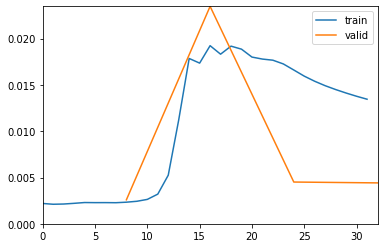

epoch,train_loss,valid_loss,root_mean_squared_error,time
0,0.005697,0.003567,0.059724,00:01
1,0.004388,0.002912,0.053965,00:01
2,0.003803,0.002316,0.048122,00:01
3,0.003393,0.002293,0.047889,00:01
4,0.003112,0.002225,0.047173,00:01
5,0.002941,0.002221,0.047132,00:01


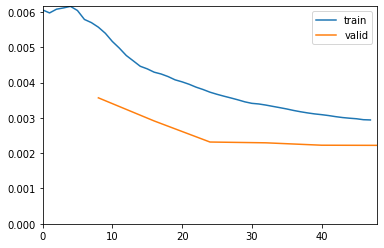

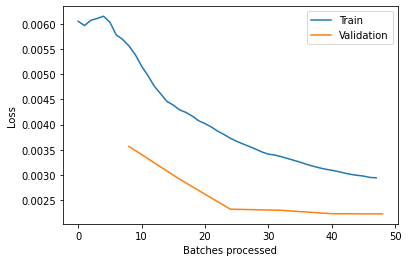

In [20]:
#  higher learn-rate 
learn.fit_one_cycle(4, lr)

# smaller rate 
learn.fit_one_cycle(6, lr/20)

# plot losses
learn.recorder.plot_losses()

In [21]:
#Prediction 
df_final = pd.DataFrame(columns=['Item_Id', 'Low_Cap_Price'])

for index, row in test_df.iterrows():
  df_final.loc[index] =[row['Item_Id'],float(learn.predict(row)[1])]
  

In [22]:
df_final.nlargest(5, ['Low_Cap_Price'])

,Item_Id,Low_Cap_Price
1784,IT_300360,992.325256
4101,IT_334082,2.751303
3210,IT_319330,1.662613
3414,IT_321425,1.504882
2909,IT_315857,1.470751


In [23]:
#Transform the y values back
df_final['Low_Cap_Price'] = ((df_final['Low_Cap_Price'])*(max_price-min_price))+min_price
df_final.head(5)

,Item_Id,Low_Cap_Price
0,IT_265079,2541.468351
1,IT_265087,2816.512716
2,IT_265107,6872.139441
3,IT_265139,8563.552866
4,IT_265142,1844.875653


In [24]:
df_final.to_csv("/content/gdrive/My Drive/app/data/Price/Output.csv", index = False)

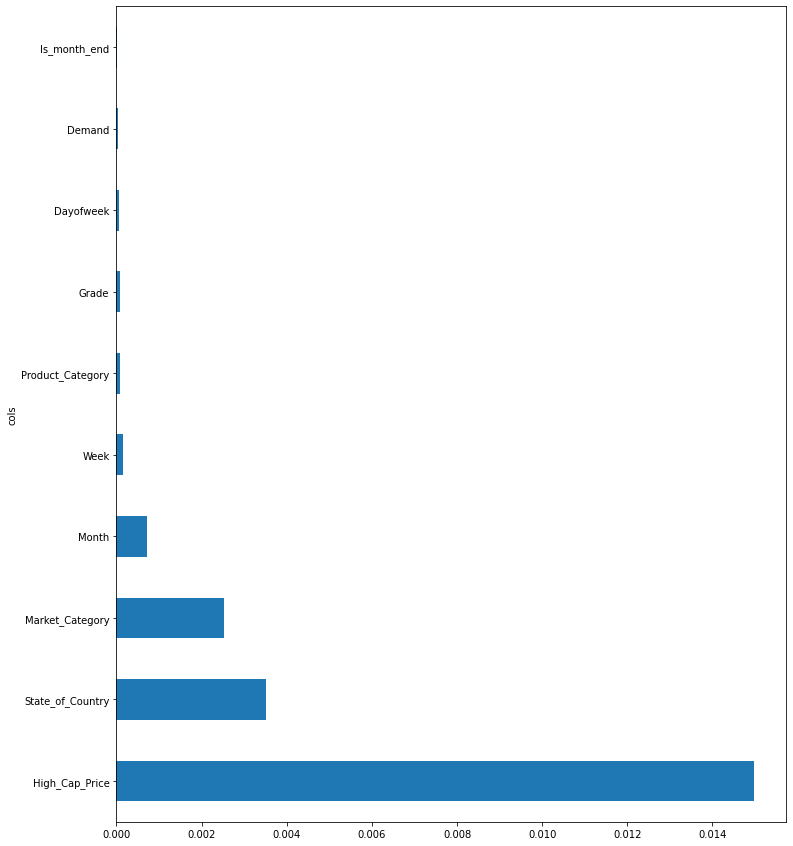

In [25]:

# Assumes all necessary fast.ai v1.0 libraries are loaded

def feature_importance(learner): 
    data = learner.data.train_ds.x
    cat_names = data.cat_names
    cont_names = data.cont_names
    loss0=np.array([learner.loss_func(learner.pred_batch(batch=(x,y.to("cpu"))), y.to("cpu")) for x,y in iter(learner.data.valid_dl)]).mean()
    fi=dict()
    types=[cat_names, cont_names]
    for j, t in enumerate(types):
      for i, c in enumerate(t):
        loss=[]
        for x,y in iter(learner.data.valid_dl):
          col=x[j][:,i]    #x[0] da hier cat-vars
          idx = torch.randperm(col.nelement())
          x[j][:,i] = col.view(-1)[idx].view(col.size())
          y=y.to('cpu')
          loss.append(learner.loss_func(learner.pred_batch(batch=(x,y)), y))
        fi[c]=np.array(loss).mean()-loss0
    d = sorted(fi.items(), key=lambda kv: kv[1], reverse=True)
    return pd.DataFrame({'cols': [l for l, v in d], 'imp': np.log1p([v for l, v in d])})
  
  ## my model is called 'learn'
features = feature_importance(learn)
  
  ## plot 'em!
features.plot('cols', 'imp', 'barh', figsize=(12,15), legend=False)